In [30]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [85]:
datapath = '/raid/ra40/data/ras/double_gyre/'

resolutions = ['5km','10km','20km','40km']
data = {}
for res in resolutions:
    data[res] = {'month_mean' : None, 'grid' : None}

for res in resolutions:
    data[res]['month_mean']= xr.open_dataset(datapath + res + '/ocean_mean_month.nc',decode_times=False).sum('zl')
    data[res]['grid']= xr.open_dataset(datapath + res + '/ocean_geometry.nc',decode_times=False).rename({'lonh' : 'xh', 'lath' : 'yh'})

In [86]:
# Penetration of jet based on https://journals.ametsoc.org/doi/abs/10.1175/1520-0485%281995%29025%3C0806%3ATSASOA%3E2.0.CO%3B2
# First moment of kinetic energy with respect to x 

jet_metric = dict.fromkeys(resolutions)
for res in resolutions:
    jet_metric[res] = (data[res]['month_mean'].KE*data[res]['grid'].geolon*data[res]['grid'].Ah).sum(('xh','yh'))/( data[res]['month_mean'].KE*data[res]['grid'].Ah ).sum(('xh','yh'))

Text(0,0.5,'Jet Penetration (Longitude)')

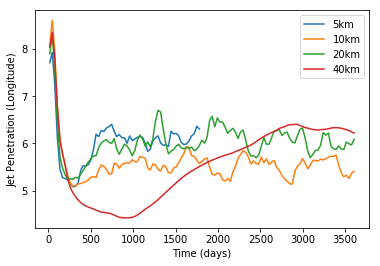

In [88]:
for res in resolutions:
    plt.plot(jet_metric[res].time,jet_metric[res],label=res)
    plt.legend()
    
plt.xlabel('Time (days)')
plt.ylabel('Jet Penetration (Longitude)')